# Segmenting with cellpose

In [1]:
# !pip install git+https://github.com/epigen-UCSD/merfish_tools.git

##### Import required packages

In [1]:
import sys
import os
print(os.getcwd())
os.chdir('..')
print(os.getcwd())
import mftools

/home/eboone/mftools/scripts
/home/eboone/mftools


In [2]:
import cellpose
cellpose.version
import sys
print(sys.version)

3.10.14 | packaged by conda-forge | (main, Mar 20 2024, 12:45:18) [GCC 12.3.0]


##### Load variables

In [3]:
# Filepath naming (Ren9)
MERSCOPE_DIR = "/mnt/merfish16/MERSCOPE"
EXPIRIMENT_NAME = "202404071501_20240407M156BICANRen15_VMSC10102"

# Other global params
ZSLICE = 3
CHANNEL = "DAPI" 
TEST_FOV = 150

# PATH PARAMS 
# CHANGE ONLY IF NEEDED: these should be standardized in the future and creation of these dirs automated from
# globalized config file
MER_RAWDATA_DIR = "data"
MER_OUTPUT_DIR = "output"
CELLPOSE_DIR = "cellpose"
MASKS_DIR = "masks" 

# Path assembly
image_dataset_path = f"{MERSCOPE_DIR}/{MER_RAWDATA_DIR}/{EXPIRIMENT_NAME}/" # Used to load imageset
expiriment_out_path = f"{MERSCOPE_DIR}/{MER_OUTPUT_DIR}/{EXPIRIMENT_NAME}/" # Used to find barcodes 
cellpose_out_path = f"./{CELLPOSE_DIR}/" # used to save final cellpose output
masks_out_path = f"{cellpose_out_path}{MASKS_DIR}/" # used to save masks

print(f"Looking for images in {image_dataset_path}")
print(f"Writing {expiriment_out_path}")
print(f"{cellpose_out_path}")
print(f"{masks_out_path}")

Looking for images in /mnt/merfish16/MERSCOPE/data/202404071501_20240407M156BICANRen15_VMSC10102/
Writing /mnt/merfish16/MERSCOPE/output/202404071501_20240407M156BICANRen15_VMSC10102/
./cellpose/
./cellpose/masks/


In [4]:
# # ALT for ease of use (REN20)
# MERSCOPE_DIR = "/mnt/merfish14/MERSCOPE/output"
# EXPIRIMENT_NAME = "202405241210_20240524M168BICANRen20_VMSC02201"

# # Other global params
# ZSLICE = 3
# CHANNEL = "DAPI" 

# # PATH PARAMS 
# # CHANGE ONLY IF NEEDED: these should be standardized in the future and creation of these dirs automated from
# # globalized config file
# MER_RAWDATA_DIR = "data"
# MER_OUTPUT_DIR = "output"
# CELLPOSE_DIR = "cellpose"
# MASKS_DIR = "masks" 

# # Path assembly
# image_dataset_path = f"{MERSCOPE_DIR}/{MER_RAWDATA_DIR}/{EXPIRIMENT_NAME}/" # Used to load imageset
# expiriment_out_path = f"{MERSCOPE_DIR}/{MER_OUTPUT_DIR}/{EXPIRIMENT_NAME}/" # Used to find barcodes 
# cellpose_out_path = f"./{CELLPOSE_DIR}/" # used to save final cellpose output
# masks_out_path = f"{cellpose_out_path}{MASKS_DIR}/" # used to save masks


In [4]:
# Check directory structure

needed_dirs = [image_dataset_path, expiriment_out_path, cellpose_out_path, masks_out_path]
print(needed_dirs)
for path in needed_dirs:
    os.makedirs(path, exist_ok=True)

    if os.path.exists(path):
        if not os.access(path, os.W_OK) or not os.access(path, os.R_OK):
            raise RuntimeError(f"You do not have read/write permissions in directory \"{path}\"")
    else:
        raise RuntimeError(f"Attempted to create \"{path}\" but failed. Check that you have permission.")


['/mnt/merfish16/MERSCOPE/data/202404071501_20240407M156BICANRen15_VMSC10102/', '/mnt/merfish16/MERSCOPE/output/202404071501_20240407M156BICANRen15_VMSC10102/', './cellpose/', './cellpose/masks/']


In [5]:
from mftools.fileio import ImageDataset

In [6]:
# Use file path like format ("/mnt/merfish12/MERSCOPE/merfish_raw_data/202401261424_20240126M134UWA7648CX22PuS6_VMSC10102")
print(image_dataset_path)
imageset = ImageDataset(image_dataset_path)

/mnt/merfish16/MERSCOPE/data/202404071501_20240407M156BICANRen15_VMSC10102/


In [7]:
from mftools.segmentation import CellSegmentation

In [8]:
seg = CellSegmentation(imagedata=imageset, channel=CHANNEL, zslice=ZSLICE)

In [9]:
# index seg to access the mask for that FOV
mask = seg[TEST_FOV]

/home/eboone/miniforge3/envs/CellSegmentation/lib/python3.10/site-packages/cellpose/plot.py:39: RuntimeWarning: overflow encountered in square
  mag = np.clip(transforms.normalize99(np.sqrt(np.sum(dP**2, axis=0))), 0, 1.)
/home/eboone/miniforge3/envs/CellSegmentation/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [10]:
dapi = imageset.load_image(channel=CHANNEL, fov=TEST_FOV, max_projection=True)

(-0.5, 2047.5, 2047.5, -0.5)

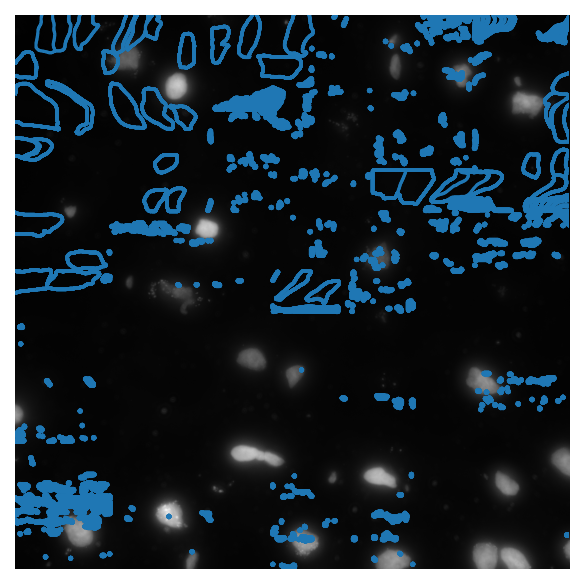

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(dpi=150)
plt.imshow(dapi, cmap="gray")
plt.contour(mask, [x+0.5 for x in np.unique(mask)], colors="tab:blue")
plt.axis("off")

In [16]:
from cellpose import models

test = models.Cellpose()

In [13]:
from skimage.measure import regionprops

centroids = np.array([cell.centroid for cell in regionprops(mask)])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(dpi=150)
plt.imshow(dapi, cmap="gray")
plt.scatter(centroids[:,1], centroids[:,0], c="tab:blue", s=2)
plt.axis("off");

In [ ]:
# save the segmentations to mask, This should be in MERSCOPE/Output/
# seg = CellSegmentation("/mnt/merfish4v1/RNA_MERFISH/MERSCOPE/Output/202212021545_20221202M064BA19S09352_VMSC02201_cellpose/masks", imagedata=imageset)

# seg = CellSegmentation("/mnt/merfish10/RNA_MERFISH/MERSCOPE/Output/202310081756_20231008M114MUSLivSenTS2_VMSC10102/cellpose/masks", imagedata=imageset, channel="DAPI", zslice=3)
# seg = CellSegmentation("/mnt/merfish10/RNA_MERFISH/MERSCOPE/Output/202310082020_20231008M113MUSLivSenTS1_VMSC10002/cellpose/masks", imagedata=imageset, channel="DAPI", zslice=3)
# seg = CellSegmentation("/mnt/merfish10/RNA_MERFISH/MERSCOPE/Output/202310201605_20231020M117MUSMBrSenTS2_VMSC10002/cellpose/masks", imagedata=imageset, channel="DAPI", zslice=3)
# seg = CellSegmentation("/mnt/merfish12/MERSCOPE/merfish_output/202401261424_20240126M134UWA7648CX22PuS6_VMSC10102/cellpose/masks", imagedata=imageset, channel="DAPI", zslice=3)
# seg = CellSegmentation(mask_folder=masks_out_path, 
#                        imagedata=imageset, 
#                        channel="DAPI", 
#                        zslice=3)
# seg.segment_fov(500)

__Generating a new cell by gene table__

In [ ]:
# If you are using the MERFISH tools to create a new cell segmentation with cellpose, use the CellSegmentation created above with the image dataset
# seg = CellSegmentation(imagedata=imageset, channel="DAPI", zslice=3)

In [ ]:
# 119 minutes
# Create cell metadata table from segmentation masks, which contains local and global coordinates of the cells, as well as their volumes
metadata = seg.metadata

In [ ]:
from mftools.fileio import MerfishAnalysis

# something like this: output = MerfishAnalysis("/mnt/merfish4v1/RNA_MERFISH/MERSCOPE/Output/202212021545_20221202M064BA19S09352_VMSC02201_cellpose")
# Needed to load the original detected transcripts made by the Vizgen output

# output = MerfishAnalysis("/mnt/merfish10/RNA_MERFISH/MERSCOPE/Output/202310081756_20231008M114MUSLivSenTS2_VMSC10102/cellpose")
output = MerfishAnalysis(cellpose_out_path)

In [ ]:
output.save_cell_metadata(metadata)

In [ ]:
# something like this: original = MerfishAnalysis("/mnt/merfish4v1/RNA_MERFISH/MERSCOPE/Output/202212021545_20221202M064BA19S09352_VMSC02201")

# original = MerfishAnalysis("/mnt/merfish10/RNA_MERFISH/MERSCOPE/Output/202310081756_20231008M114MUSLivSenTS2_VMSC10102")
original = MerfishAnalysis(expiriment_out_path)



In [ ]:
barcodes = original.load_barcode_table()


In [ ]:
from mftools.barcodes import assign_to_cells
assign_to_cells(barcodes, seg)

In [ ]:
import matplotlib.pyplot as plt
incells = barcodes[(barcodes['fov'] == TEST_FOV) & (barcodes['cell_id'] != 0)]
plt.scatter(incells['x'], incells['y'], s=1)
outcells = barcodes[(barcodes['fov'] == TEST_FOV) & (barcodes['cell_id'] == 0)]
plt.scatter(outcells['x'], outcells['y'], s=1)

In [ ]:
from mftools.barcodes import link_cell_ids

link_cell_ids(barcodes, seg.linked_cells)

In [ ]:
output.save_barcode_table(barcodes)


In [ ]:
barcodes = output.load_barcode_table()


In [ ]:
from mftools.barcodes import create_cell_by_gene_table
cbgtab = create_cell_by_gene_table(barcodes)

In [ ]:
cbgtab.index = cbgtab.index.astype(int)

In [ ]:
output.save_cell_by_gene_table(cbgtab)

# USE THE STUFF BELOW

In [ ]:
# If you are using the MERFISH tools to create a new cell segmentation with cellpose, use the CellSegmentation created above with the image dataset
# seg = CellSegmentation(imagedata=imageset, channel="DAPI", zslice=3)


In [ ]:
# 119 minutes
# Create cell metadata table from segmentation masks, which contains local and global coordinates of the cells, as well as their volumes
metadata = seg.metadata

In [ ]:
from merfish_tools.mftools.fileio import MerfishAnalysis

# something like this: output = MerfishAnalysis("/mnt/merfish4v1/RNA_MERFISH/MERSCOPE/Output/202212021545_20221202M064BA19S09352_VMSC02201_cellpose")
# Needed to load the original detected transcripts made by the Vizgen output

# output = MerfishAnalysis("/mnt/merfish10/RNA_MERFISH/MERSCOPE/Output/202310081756_20231008M114MUSLivSenTS2_VMSC10102/cellpose")
output = MerfishAnalysis(CELLPOSE_OUT)

In [ ]:
output.save_cell_metadata(metadata)

In [ ]:
# something like this: original = MerfishAnalysis("/mnt/merfish4v1/RNA_MERFISH/MERSCOPE/Output/202212021545_20221202M064BA19S09352_VMSC02201")

# original = MerfishAnalysis("/mnt/merfish10/RNA_MERFISH/MERSCOPE/Output/202310081756_20231008M114MUSLivSenTS2_VMSC10102")
original = MerfishAnalysis(MERFISH_OUT)



In [ ]:
barcodes = original.load_barcode_table()


In [ ]:
from mftools.barcodes import assign_to_cells
assign_to_cells(barcodes, seg)

In [ ]:
import matplotlib.pyplot as plt
incells = barcodes[(barcodes['fov'] == 150) & (barcodes['cell_id'] != 0)]
plt.scatter(incells['x'], incells['y'], s=1)
outcells = barcodes[(barcodes['fov'] == 150) & (barcodes['cell_id'] == 0)]
plt.scatter(outcells['x'], outcells['y'], s=1)

In [ ]:
from mftools.barcodes import link_cell_ids

link_cell_ids(barcodes, seg.linked_cells)

In [ ]:
output.save_barcode_table(barcodes)


In [ ]:
barcodes = output.load_barcode_table()


In [ ]:
from mftools.barcodes import create_cell_by_gene_table
cbgtab = create_cell_by_gene_table(barcodes)

In [ ]:
cbgtab.index = cbgtab.index.astype(int)

In [ ]:
output.save_cell_by_gene_table(cbgtab)